## classification thru scikit-learn

In [1]:
import warnings

# 불필요한 경고 출력을 방지 함
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [4]:
# using iris data set
from sklearn.datasets import load_iris

In [5]:
# load data set
iris = load_iris()

In [9]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
data = iris["data"]
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
# 지도학습 : 분류
target = iris["target"]
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# put array into DataFrame
df_iris = pd.DataFrame(data,columns=iris["feature_names"])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df_iris["target"] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'sepal')

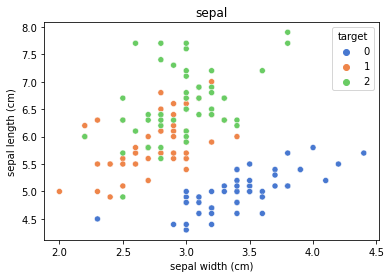

In [22]:
# scatterplot : 산점도 그래프
sns.scatterplot('sepal width (cm)','sepal length (cm)',hue="target", palette="muted", data=df_iris)
plt.title("sepal")

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'petal')

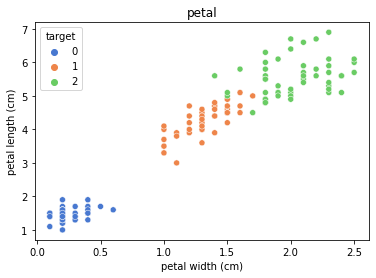

In [21]:
sns.scatterplot('petal width (cm)','petal length (cm)',hue="target", palette="muted", data=df_iris)
plt.title("petal")

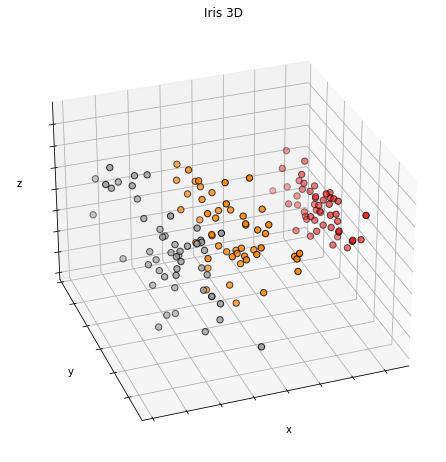

In [23]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [24]:
# dividing data
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop("target",1),df_iris["target"], test_size=0.2)

In [29]:
x_train.shape, x_valid.shape

((120, 4), (30, 4))

In [30]:
y_train.shape, y_valid.shape

((120,), (30,))

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

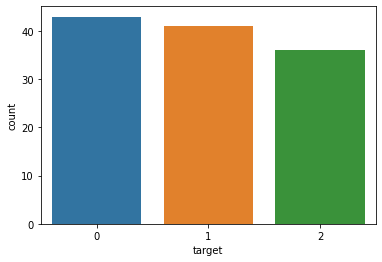

In [31]:
sns.countplot(y_train)

In [33]:
# 클래스 데이터의 수량을 균등하게 배분
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop("target",1),df_iris["target"], test_size=0.2, stratify=df_iris["target"])

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

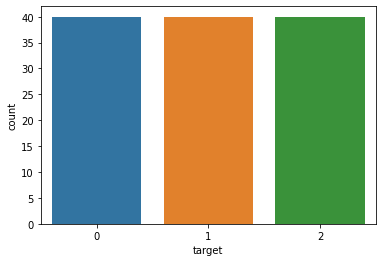

In [34]:
sns.countplot(y_train)

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

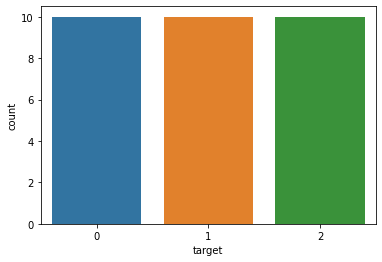

In [35]:
sns.countplot(y_valid)

### Logistic Regression

In [37]:
# 독립변수의 선형 결합을 사용하여 사건의 발생 가능성 예측 (분류해서 어디에 속할 것이냐 판단)
from sklearn.linear_model import LogisticRegression


In [38]:
# define model
model = LogisticRegression()

In [39]:
# model learning
model.fit(x_train,y_train)

/Volumes/Geozedo60/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# check result for well-learned (predict)
prediction = model.predict(x_valid)
print(prediction)

[1 1 2 2 0 0 0 1 1 2 2 2 0 1 0 1 0 1 2 1 1 0 2 1 0 0 0 2 1 1]


In [42]:
(prediction == y_valid).mean()

0.9333333333333333

### SGD classifier

In [91]:
# import 
from sklearn.linear_model import SGDClassifier

In [100]:
# define
# random_state= random seed (effect to result)
sgd = SGDClassifier(random_state=100)

In [101]:
# learning
sgd.fit(x_train,y_train)

SGDClassifier(random_state=100)

In [102]:
# test result
prediction = sgd.predict(x_valid)

In [103]:
(prediction == y_valid).mean()

0.9666666666666667

In [104]:
# tune hyper-parameter
# random_state -> have to be held on
# n_jobs= -1 : using whole cpu core, improve learning speed
# SGD classifer use not GPU, use CPU
# for preventing overfitting, using L1 (Lasso Regularization)

sgd = SGDClassifier(penalty="l1", random_state=100, n_jobs=-1)

In [105]:
sgd.fit(x_train,y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=100)

In [106]:
prediction = sgd.predict(x_valid)

In [107]:
(prediction == y_valid).mean()

1.0

### K-NN : K-Neighbors Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
# assignment
# K=5, default
model = KNeighborsClassifier()

In [110]:
# learn
model.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
prediction = model.predict(x_valid)

In [113]:
(prediction == y_valid).mean()

0.9666666666666667

In [190]:
# K = 7
model1 = KNeighborsClassifier(n_neighbors=5)

In [191]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [192]:
prediction = model1.predict(x_valid)

In [193]:
(prediction == y_valid).mean()

0.9666666666666667

### SVC
    -support vector machine
#### divided by 1d(line), 2d(square)

![image.png](attachment:image.png)Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [201]:
from sklearn.svm import SVC

In [206]:
model3 = SVC(random_state=123)

In [207]:
model3.fit(x_train, y_train)

SVC(random_state=123)

In [208]:
prediction = model3.predict(x_valid)

In [209]:
(prediction == y_valid).mean()

0.9333333333333333

### Decision Tree
    - thru yes or no, make big tree branch

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [239]:
model4 = DecisionTreeClassifier(random_state=0)

In [240]:
model4.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [241]:
prediction = model4.predict(x_valid)

In [242]:
(prediction == y_valid).mean()

0.9666666666666667

[Text(200.88000000000002, 605.7257142857143, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(133.92000000000002, 512.537142857143, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(267.84000000000003, 512.537142857143, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(200.88000000000002, 419.34857142857146, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(334.80000000000007, 419.34857142857146, 'X[3] <= 1.75\ngini = 0.165\nsamples = 44\nvalue = [0, 4, 40]'),
 Text(133.92000000000002, 326.16, 'X[2] <= 4.95\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(66.96000000000001, 232.9714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(200.88000000000002, 232.9714285714286, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(133.92000000000002, 139.7828571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 139.7828571428571, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [

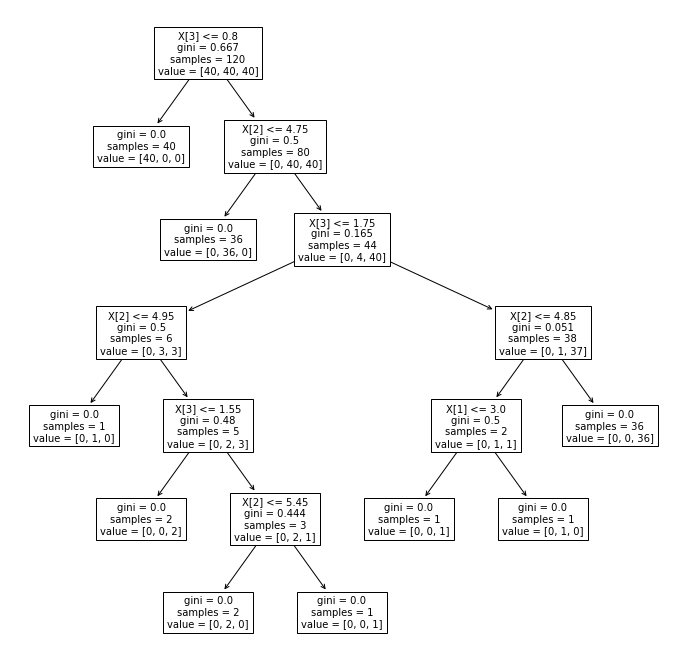

In [243]:
plt.figure(figsize=(12,12))
tree.plot_tree(model4, fontsize=10)

In [244]:
# from sklearn.tree import export_graphviz
# from sklearn.tree import tree
# from subprocess import call

# def graph_tree(model):
#     # .dot 파일로 export 해줍니다
#     export_graphviz(model, out_file='tree.dot')

#     # 생성된 .dot 파일을 .png로 변환
#     call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

#     # .png 출력
#     return Image(filename = 'decistion-tree.jpg', width=500)

In [245]:
# graph_tree(model4)